In [408]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Obtaning Results for Both Methods - Whittle and MLE**

In [409]:
results_both_methods = pd.read_csv("results.csv")

In [410]:
hawkes_whittle_data_experiment = results_both_methods[results_both_methods["Estimation Method"] == "whittle"]

In [411]:
hawkes_mle_data_experiment = results_both_methods[results_both_methods["Estimation Method"] == "mle"]

**Shape of the data**

In [412]:
hawkes_whittle_data_experiment.shape

(0, 14)

In [413]:
hawkes_mle_data_experiment.shape

(10000, 14)

**Type of the data**

In [414]:
hawkes_whittle_data_experiment.head()

,Test Index,Simulation Index,Real Alpha,Real Beta,Real Baseline,Real Endogeneity,Delta,Estimated Alpha,Estimated Beta,Estimated Baseline,Estimated Endogeneity,Duplicates,Estimation Method,Initial Estimation Point


In [415]:
hawkes_mle_data_experiment.head()

,Test Index,Simulation Index,Real Alpha,Real Beta,Real Baseline,Real Endogeneity,Delta,Estimated Alpha,Estimated Beta,Estimated Baseline,Estimated Endogeneity,Duplicates,Estimation Method,Initial Estimation Point
0,1,1,0.5,1.5,1,0.333333,0.0000,0.509574,1.670606,0.990822,0.305024,randomize,mle,original_parameters
1,1,1,0.5,1.5,1,0.333333,0.0020,0.509590,1.670633,0.990791,0.305028,randomize,mle,original_parameters
2,1,1,0.5,1.5,1,0.333333,0.0040,0.509536,1.671778,0.990899,0.304787,randomize,mle,original_parameters
3,1,1,0.5,1.5,1,0.333333,0.0061,0.509377,1.673369,0.991220,0.304402,randomize,mle,original_parameters
4,1,1,0.5,1.5,1,0.333333,0.0081,0.509636,1.669531,0.990698,0.305257,randomize,mle,original_parameters


**Plotting the mean of estimated values for each test for each delta value**

In [416]:
def return_mean_estimated_parameters_by_each_test_per_delta(hawkes_data_experiment):
    number_of_tests = hawkes_data_experiment["Test Index"].nunique()
    number_of_deltas = hawkes_data_experiment["Simulation Index"].nunique()
    different_deltas = hawkes_data_experiment["Delta"].unique()
    print(f"Deltas Values: {different_deltas}")

    mean_estimated_parameters_by_test_per_delta = pd.DataFrame(columns = ["Test Index", "Delta", "Mean Estimated Baseline", "Mean Estimated Alpha", "Mean Estimated Beta", "Max Estimated Baseline", "Max Estimated Alpha", "Max Estimated Beta", "Min Estimated Baseline", "Min Estimated Alpha", "Min Estimated Beta","Std Estimated Baseline", "Std Estimated Alpha", "Std Estimated Beta"])
    
    for i in range(1,number_of_tests + 1):
        current_test = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]
        for delta in different_deltas:
            current_test_for_this_delta = current_test[current_test["Delta"] == delta]
            current_estimated_mean_alpha = current_test_for_this_delta["Estimated Alpha"].mean()
            current_estimated_mean_beta = current_test_for_this_delta["Estimated Beta"].mean()
            current_estimated_mean_baseline = current_test_for_this_delta["Estimated Baseline"].mean()
            current_max_estimated_alpha = current_test_for_this_delta["Estimated Alpha"].max()
            current_max_estimated_beta = current_test_for_this_delta["Estimated Beta"].max()
            current_max_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].max()
            current_min_estimated_alpha = current_test_for_this_delta["Estimated Alpha"].min()
            current_min_estimated_beta = current_test_for_this_delta["Estimated Beta"].min()
            current_min_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].min()
            current_std_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].std()
            current_std_estimated_alpha = current_test_for_this_delta["Estimated Alpha"].std()
            current_std_estimated_beta = current_test_for_this_delta["Estimated Beta"].std()
            to_append = [i, delta, current_estimated_mean_baseline, current_estimated_mean_alpha, current_estimated_mean_beta, current_max_estimated_baseline, current_max_estimated_alpha, current_max_estimated_beta, current_min_estimated_baseline, current_min_estimated_alpha, current_min_estimated_beta, current_std_estimated_baseline, current_std_estimated_alpha, current_std_estimated_beta]
            to_append_series = pd.Series(to_append, index = mean_estimated_parameters_by_test_per_delta.columns)
            mean_estimated_parameters_by_test_per_delta = mean_estimated_parameters_by_test_per_delta.append(to_append_series, ignore_index = True)
            
    return mean_estimated_parameters_by_test_per_delta 
       

In [417]:
mean_estimated_parameters_by_test_per_delta_mle  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_mle_data_experiment)

Deltas Values: [0.     0.002  0.004  0.0061 0.0081 0.0101 0.0121 0.0141 0.0162 0.0182
 0.0202 0.0222 0.0242 0.0263 0.0283 0.0303 0.0323 0.0343 0.0364 0.0384
 0.0404 0.0424 0.0444 0.0465 0.0485 0.0505 0.0525 0.0545 0.0566 0.0586
 0.0606 0.0626 0.0646 0.0667 0.0687 0.0707 0.0727 0.0747 0.0768 0.0788
 0.0808 0.0828 0.0848 0.0869 0.0889 0.0909 0.0929 0.0949 0.097  0.099
 0.101  0.103  0.1051 0.1071 0.1091 0.1111 0.1131 0.1152 0.1172 0.1192
 0.1212 0.1232 0.1253 0.1273 0.1293 0.1313 0.1333 0.1354 0.1374 0.1394
 0.1414 0.1434 0.1455 0.1475 0.1495 0.1515 0.1535 0.1556 0.1576 0.1596
 0.1616 0.1636 0.1657 0.1677 0.1697 0.1717 0.1737 0.1758 0.1778 0.1798
 0.1818 0.1838 0.1859 0.1879 0.1899 0.1919 0.1939 0.196  0.198  0.2   ]


In [418]:
mean_estimated_parameters_by_test_per_delta_mle.head()

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Alpha,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Alpha,Max Estimated Beta,Min Estimated Baseline,Min Estimated Alpha,Min Estimated Beta,Std Estimated Baseline,Std Estimated Alpha,Std Estimated Beta
0,1.0,0.0000,0.995140,0.494662,1.505341,1.161797,0.565743,1.889475,0.835060,0.430312,1.139445,0.063857,0.033627,0.167655
1,1.0,0.0020,0.995146,0.494659,1.505363,1.161742,0.565690,1.889475,0.835161,0.430339,1.139520,0.063852,0.033623,0.167582
2,1.0,0.0040,0.995186,0.494638,1.505692,1.161778,0.565755,1.892308,0.835035,0.430322,1.139908,0.063858,0.033628,0.167823
3,1.0,0.0061,0.995190,0.494636,1.505733,1.162054,0.565509,1.893749,0.835511,0.430186,1.139697,0.063895,0.033642,0.167798
4,1.0,0.0081,0.995204,0.494628,1.505781,1.161362,0.565956,1.886019,0.834654,0.430525,1.139182,0.063837,0.033632,0.167813


In [419]:
mean_estimated_parameters_by_test_per_delta_whittle  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_whittle_data_experiment)

Deltas Values: []


In [420]:
mean_estimated_parameters_by_test_per_delta_whittle.head()

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Alpha,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Alpha,Max Estimated Beta,Min Estimated Baseline,Min Estimated Alpha,Min Estimated Beta,Std Estimated Baseline,Std Estimated Alpha,Std Estimated Beta


**Plotting mean of estimated $\alpha$ for each test vs $\delta$**

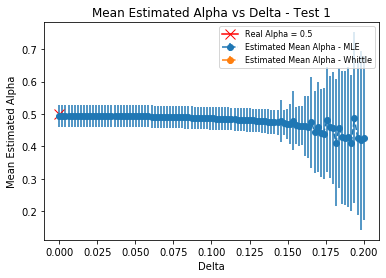

In [421]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()


for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    #plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Mle")
    #plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Alpha"] , fmt='--o', label = "Estimated Mean Alpha - MLE")
    plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Alpha"] , fmt='--o', label = "Estimated Mean Alpha - Whittle")
    plt.plot([0], [real_alpha], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Alpha = {real_alpha}", color = 'r')
    plt.title(f"Mean Estimated Alpha vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Alpha")
    plt.legend(loc =  1,  prop={"size":8})
    plt.show()

**Plotting mean of estimated $\beta$ for each test vs $\delta$**

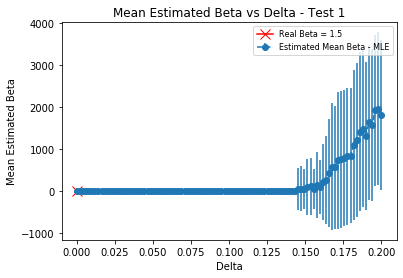

In [422]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    ##plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Mle")
    ##plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean Beta - MLE")
    ##plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean Beta - Whittle")
    plt.plot([0], [real_beta], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Beta = {real_beta}", color = 'r')
    plt.title(f"Mean Estimated Beta vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Beta")
    plt.legend(loc =  1,  prop={"size":8})
    plt.show()



**Plotting mean of estimated $\lambda_{0}$ for each test vs $\delta$**

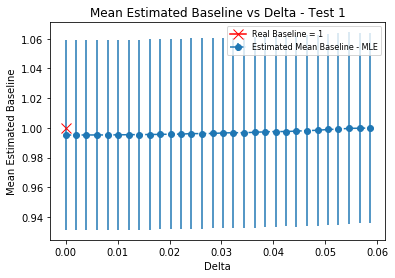

In [423]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    ##plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Mle")
    ##plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"][:30], mean_estimated_parameters_current_test_mle["Mean Estimated Baseline"][:30] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Baseline"][:30] , fmt='--o', label = "Estimated Mean Baseline - MLE")
    ##plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"][:30], mean_estimated_parameters_current_test_whittle["Mean Estimated Baseline"][:30] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Baseline"][:30] , fmt='--o', label = "Estimated Mean Baseline - Whittle")
    plt.plot([0], [real_baseline], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Baseline = {real_baseline}", color = 'r')
    plt.title(f"Mean Estimated Baseline vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Baseline")
    plt.legend(loc =  1,  prop={"size":8})
    plt.show()

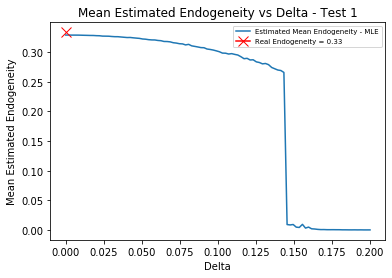

In [424]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()


for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    real_endogeneity = real_alpha/real_beta
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"]/mean_estimated_parameters_current_test_mle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Endogeneity - MLE")
    ##plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"]/mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Endogeneity - Whittle")
    ##plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"]/mean_estimated_parameters_current_test_mle["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Alpha"]/mean_estimated_parameters_current_test_whittle["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean ENdogeneity - MLE")
    ##plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"]/mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Alpha"]/mean_estimated_parameters_current_test_whittle["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean Endogeneity - Whittle")
    plt.plot([0], [real_endogeneity], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Endogeneity = {real_endogeneity:.2f}", color = 'r')
    plt.title(f"Mean Estimated Endogeneity vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Endogeneity")
    plt.legend(loc =  1,  prop={"size":7})
    plt.show()

## Studying the mean distribution of timestamps within $\delta$-bins

In [425]:
bin_mean_count = pd.read_csv("bin_count.csv")

In [426]:
bin_mean_count.head()

,Test Index,Simulation Index,Delta,Mean Bin Count
0,1,1,0.0020,0.004040
1,1,1,0.0040,0.008080
2,1,1,0.0061,0.012322
3,1,1,0.0081,0.016362
4,1,1,0.0101,0.020402


In [427]:
bin_mean_count.shape

(9900, 4)

**Mean Bin Cout per $\delta$**

In [428]:
bin_mean_count_per_delta = bin_mean_count.groupby("Delta").mean()["Mean Bin Count"]

In [429]:
bin_mean_count_per_delta

Delta
0.0020    0.003940
0.0040    0.007879
0.0061    0.012016
0.0081    0.015955
0.0101    0.019895
0.0121    0.023835
0.0141    0.027774
0.0162    0.031910
0.0182    0.035850
0.0202    0.039790
0.0222    0.043729
0.0242    0.047669
0.0263    0.051806
0.0283    0.055745
0.0303    0.059684
0.0323    0.063625
0.0343    0.067564
0.0364    0.071701
0.0384    0.075641
0.0404    0.079580
0.0424    0.083521
0.0444    0.087459
0.0465    0.091595
0.0485    0.095536
0.0505    0.099478
0.0525    0.103415
0.0545    0.107355
0.0566    0.111493
0.0586    0.115433
0.0606    0.119372
0.0626    0.123310
0.0646    0.127253
0.0667    0.131387
0.0687    0.135322
0.0707    0.139264
0.0727    0.143202
0.0747    0.147150
0.0768    0.151286
0.0788    0.155220
0.0808    0.159158
0.0828    0.163098
0.0848    0.167040
0.0869    0.171177
0.0889    0.175118
0.0909    0.179050
0.0929    0.182992
0.0949    0.186934
0.0970    0.191068
0.0990    0.195002
0.1010    0.198962
0.1030    0.202896
0.1051    0.207033
0.1071

Text(0.01, 0.18, '$\\alpha$ = 0.50')

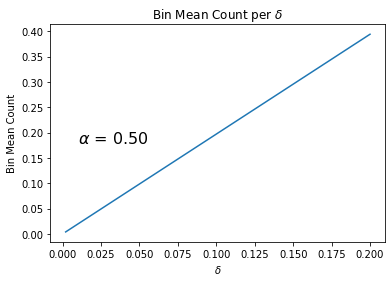

In [430]:
plt.plot(bin_mean_count["Delta"].unique(), bin_mean_count_per_delta)
plt.title(r"Bin Mean Count per $\delta$")
plt.ylabel("Bin Mean Count")
plt.xlabel(r"$\delta$")
plt.text(0.01, 0.18, r"$\alpha$ = {:.2f}".format(real_alpha), fontsize = 16)

**From theory, we know that the mean baseline per unit time is given by: $\overline{\lambda} = \frac{\lambda_{0}}{1 - \frac{\alpha}{\beta}}$:**

**Theoretical mean baseline:**

In [431]:
print(f"{real_baseline/(1 - (real_alpha/real_beta)):.2f}")

1.50


**Empirical mean baseline:**

In [432]:
print("{:.2f}".format(np.mean(bin_mean_count_per_delta/bin_mean_count["Delta"].unique())))

1.97


## Testing for different $\alpha$

In [433]:
colors = ['b','g','r','m','peru','c','y','k','orange','mediumblue']

In [434]:
hawkes_mle_data_experiment_different_alphas = pd.read_csv("results_mle_different_alphas.csv")

In [435]:
mean_estimated_parameters_by_test_per_delta_mle_different_alphas  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_mle_data_experiment_different_alphas)

Deltas Values: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]


In [436]:
mean_estimated_parameters_by_test_per_delta_mle_different_alphas.head(5)

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Alpha,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Alpha,Max Estimated Beta,Min Estimated Baseline,Min Estimated Alpha,Min Estimated Beta,Std Estimated Baseline,Std Estimated Alpha,Std Estimated Beta
0,1.0,0.00,1.010064,0.497804,1.563619,1.200821,0.564573,2.079975,0.847174,0.421768,1.029990,0.071606,0.032052,0.199863
1,1.0,0.01,1.010174,0.497750,1.564377,1.201356,0.564781,2.086809,0.846621,0.421512,1.027871,0.071581,0.032043,0.200046
2,1.0,0.02,1.010607,0.497532,1.567491,1.202012,0.564780,2.090438,0.847497,0.421191,1.027085,0.071671,0.032113,0.201672
3,1.0,0.03,1.011357,0.497162,1.572244,1.202215,0.564657,2.122490,0.846480,0.421096,1.027242,0.071874,0.032147,0.202204
4,1.0,0.04,1.012439,0.496622,1.579561,1.203559,0.564064,2.167932,0.847089,0.420445,1.033735,0.072160,0.032285,0.207421


5


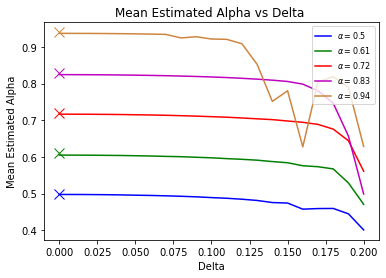

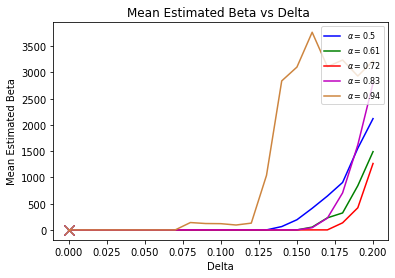

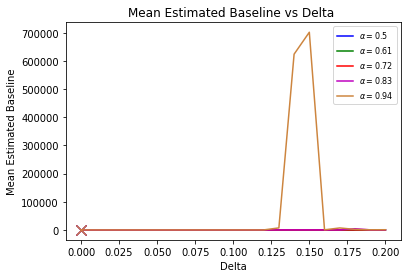

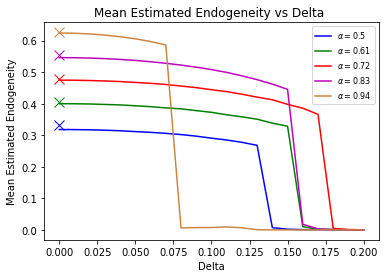

In [437]:
number_of_tests = hawkes_mle_data_experiment_different_alphas["Test Index"].nunique()
print(number_of_tests) 


for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0] 
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = r"$\alpha = {}$".format(real_alpha), color = colors[i-1])
    plt.plot([0], [real_alpha], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Alpha vs Delta ")
plt.xlabel("Delta")
plt.ylabel("Mean Estimated Alpha")
plt.show()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0] 
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = r"$\alpha = {}$".format(real_alpha), color = colors[i-1])
    plt.plot([0], [real_beta], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Beta vs Delta ")
plt.xlabel("Delta")
plt.ylabel("Mean Estimated Beta")
plt.show()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0] 
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Baseline"], linewidth = 1.5, markersize = 10, label = r"$\alpha = {}$".format(real_alpha), color = colors[i-1])
    plt.plot([0], [real_baseline], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Baseline vs Delta ")
plt.xlabel("Delta")
plt.ylabel("Mean Estimated Baseline")
plt.show()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0] 
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Alpha"]/mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = r"$\alpha = {}$".format(real_alpha), color = colors[i-1])
    plt.plot([0], [real_alpha/real_beta], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Endogeneity vs Delta ")
plt.xlabel("Delta")
plt.ylabel("Mean Estimated Endogeneity")
plt.show()

In [448]:
bin_mean_count_different_alphas = pd.read_csv("bin_count_different_alphas.csv")

In [449]:
bin_mean_count_per_delta_different_alphas = []
for i in range(1, number_of_tests + 1):
    bin_mean_count_different_alphas_test_i = bin_mean_count_different_alphas[bin_mean_count_different_alphas["Test Index"] == i]
    bin_mean_count_per_delta_different_alphas.append(bin_mean_count_different_alphas_test_i.groupby("Delta").mean()["Mean Bin Count"])

In [450]:
len(bin_mean_count_per_delta_different_alphas)

5

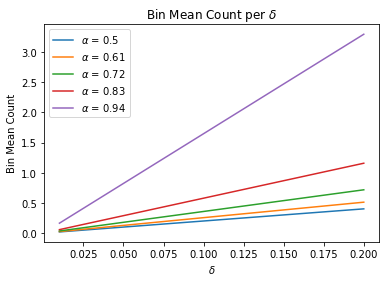

In [451]:
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    plt.plot(bin_mean_count_different_alphas["Delta"].unique(), bin_mean_count_per_delta_different_alphas[i-1], label = r"$\alpha$ = {}".format(real_alpha))
plt.title(r"Bin Mean Count per $\delta$")
plt.ylabel("Bin Mean Count")
plt.xlabel(r"$\delta$")
plt.legend()
plt.show()

**Theoretical Expected Values for Mean Intensity Rate**

In [452]:
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0]
    print(f"Test {i}: {real_baseline/(1 - (real_alpha/real_beta)):.2f}")


Test 1: 1.50
Test 2: 1.69
Test 3: 1.92
Test 4: 2.24
Test 5: 2.68


**Empirical Values for Mean Intensity Rate**

In [454]:
for i in range(1, number_of_tests + 1):
    print("{:.2f}".format(np.mean(bin_mean_count_per_delta_different_alphas[i-1]/bin_mean_count_different_alphas["Delta"].unique())))

2.01
2.56
3.59
5.79
16.48
